In [74]:
from amftrack.pipeline.functions.transport_processing.high_mag_videos.loading import load_video_dataset_local
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2
# plt.style.use('presentation.mplstyle')
%matplotlib widget
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 100


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
analysis_folder = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract"
analysis_folder_root = r"C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract/"
plate_id = "449_20230807"
videos_folder = "/projects/0/einf914/videos/"


In [3]:
indexes = {
"20230818_Plate449" : "20230818_1107_Plate10",
}

In [29]:
all_infos = pd.DataFrame()

for plate_id_video in list(indexes.keys()):
    print(plate_id_video)
    data_obj = load_video_dataset_local(plate_id_video, videos_folder, analysis_folder, analysis_folder_root)
    for index, vid_obj in enumerate(data_obj.video_objs):
        if os.path.exists(vid_obj.edge_adr):
            plt.close("all")
            edge_data_csv = pd.read_csv(vid_obj.edge_adr)
            edge_data_csv['mode'] = vid_obj.dataset['mode']
            edge_data_csv['xpos'] = vid_obj.dataset['xpos']
            edge_data_csv['ypos'] = vid_obj.dataset['ypos']
            edge_data_csv['plate_id'] = vid_obj.dataset['plate_id']
            edge_data_csv['video_int'] = vid_obj.dataset['video_int']
            edge_data_csv['record_time'] = vid_obj.dataset['record_time']
            edge_data_csv[ "time_s"] = vid_obj.dataset[ "time_(s)"]
            
           
            
            all_infos = pd.concat([all_infos,edge_data_csv])

20230818_Plate449
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230818_Plate449\051\Img\edges_data.csv. Check analysis for 20230818_Plate449_051
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230818_Plate449\052\Img\edges_data.csv. Check analysis for 20230818_Plate449_052
Couldn't find the edges data file at C:\Users\coren\AMOLF-SHIMIZU Dropbox\DATA\CocoTransport\KymoSpeeDExtract\20230818_Plate449\074\Img\edges_data.csv. Check analysis for 20230818_Plate449_074


In [30]:
# all_infos['load'] = all_infos['betweenness_automate']/all_infos['width_automate']**2
# all_infos['load2'] = all_infos['betweenness_derivative']/all_infos['width_automate']**2

all_infos['diff_left'] = np.abs(np.abs(all_infos['speed_left']) - 3.15)
all_infos['diff_right'] = np.abs(np.abs(all_infos['speed_right']) - 3.15)

# Assign 'speed_lipid' and 'speed_other' based on which speed is closer to 3.15
all_infos['speed_lipid'] = np.where(all_infos['diff_left'] <= all_infos['diff_right'], all_infos['speed_left'], all_infos['speed_right'])
all_infos['speed_other'] = np.where(all_infos['diff_left'] > all_infos['diff_right'], all_infos['speed_left'], all_infos['speed_right'])
all_infos['speed_other_abs'] = np.abs(all_infos['speed_other'])
all_infos['speed_main'] = np.where(all_infos['coverage_left'] > all_infos['coverage_right'], all_infos['speed_left'], all_infos['speed_right'])
all_infos['speed_sub'] = np.where(all_infos['coverage_left'] > all_infos['coverage_right'], all_infos['speed_right'], all_infos['speed_left'])
all_infos['speed_sub_abs'] = np.abs(all_infos['speed_sub'])

all_infos['speed_main_abs'] = np.abs(all_infos['speed_main'])
all_infos['coverage_main'] = np.where(all_infos['coverage_left'] > all_infos['coverage_right'], all_infos['coverage_left'], all_infos['coverage_right'])

# Drop the intermediate 'diff_left' and 'diff_right' columns if they are no longer needed
all_infos = all_infos.drop(['diff_left', 'diff_right'], axis=1)

In [31]:
date = '2024-04-10'
all_infos['datetime'] = pd.to_datetime(date + ' ' + all_infos['record_time'])

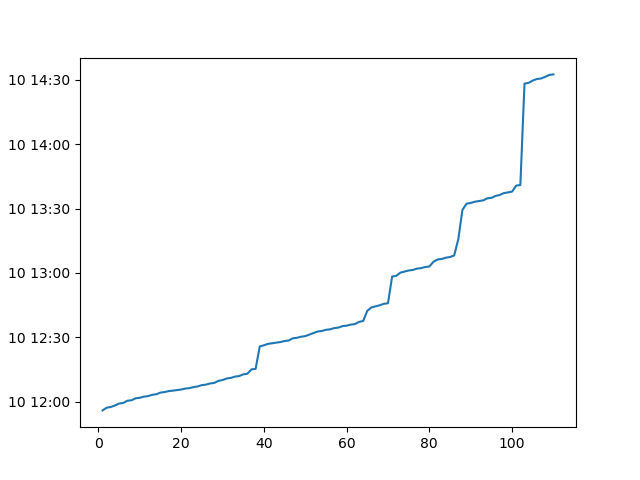

In [33]:
fig,ax = plt.subplots()
ax.plot(all_infos['video_int'],all_infos['datetime'])

In [36]:
all_infos['aligned2'] = np.sign(all_infos['flux_avg'])

In [37]:
x_pos_bleach = all_infos[all_infos['video_int']==39]["xpos"].iloc[0]
y_pos_bleach = all_infos[all_infos['video_int']==39]["ypos"].iloc[0]

time_bleach = all_infos[all_infos['video_int']==39]["record_time"].iloc[0]

In [54]:
all_infos['slowed'] = all_infos['record_time']>=time_bleach
all_infos['dist_bleach'] = np.sqrt((all_infos['ypos']-y_pos_bleach)**2+(all_infos['xpos']-x_pos_bleach)**2)
all_infos['downstream'] =  all_infos['xpos']>=x_pos_bleach
all_infos['signed_dist_bleach'] = all_infos['dist_bleach']*(2*all_infos['downstream']-1)
all_infos['group_signed_dist_bleach'] = (all_infos['signed_dist_bleach']*10).astype(int)/10

all_infos['edge'] =  all_infos['network_begin'].astype(str)+"_"+all_infos['network_end'].astype(str)

In [68]:
pivot_df1

edge speed_right           dist_bleach          
slowed                            False      True       False      True
0          156798.0_53500.0    2.879619       NaN    4.918231       NaN
1         181679.0_156798.0    2.401795       NaN    4.782905       NaN
2       1931674.0_2322440.0    3.770191  3.650958    5.335160  5.359163
3        204027.0_2472744.0    3.226308       NaN    6.865637       NaN
4       2086412.0_2271298.0    3.055771  2.166841    0.000000  0.018862
5       2152579.0_2250175.0         NaN  3.634769         NaN  1.923519
6       2175260.0_2272604.0    3.312665  2.770668    2.109221  2.123488
7       2175260.0_2307128.0    2.941461  2.323201    2.109221  2.123488
8       2196321.0_2275314.0    3.457756  2.626665    3.813080  3.814740
9       2196321.0_2311987.0    1.856050  1.457323    3.813080  3.814740
10       2271298.0_286382.0         NaN  1.575738         NaN  0.416214
11      2275314.0_2309634.0    2.950172       NaN    4.455627       NaN
12      2280405.0_2175260.0    3.616559  2.951141    2.109221  2.123488
13      2294939.0_2299540.0    3.013918  2.749011    1.091936  0.848034
14        2301778.0_53500.0    2.261253       NaN    4.985893       NaN
15       2306793.0_230336.0    3.122817       NaN    4.620010       NaN
16       2309634.0_156798.0    2.497410       NaN    4.619266       NaN
17       2309634.0_230336.0    1.852448       NaN    4.455627       NaN
18      2314438.0_2495442.0    3.772445  3.631849    3.738978  3.789457
19      2322440.0_2158656.0    2.461721  2.560479    5.335160  5.359163
20      2322440.0_2319447.0    3.633320  3.507658    5.335160  5.359163
21      2326776.0_2196321.0    4.040942  2.893431    3.813659  3.814740
22      2329018.0_1931674.0    3.479908  3.353047    5.863375  5.772420
23      2329098.0_2276851.0    1.713033       NaN    3.037252       NaN
24      2329184.0_2326776.0    3.448567       NaN    3.037252       NaN
25      2329184.0_2329098.0    1.387059       NaN    3.037252       NaN
26      2329525.0_2329098.0    3.144401       NaN    3.037252       NaN
27      2330340.0_2329184.0    3.453279       NaN    3.037252       NaN
28      2495442.0_2308703.0         NaN  3.362622         NaN  2.604588
29        53500.0_2321377.0    3.434009  2.665123    5.055776  5.274097
30                  nan_nan    3.503132       NaN    6.158427       NaN

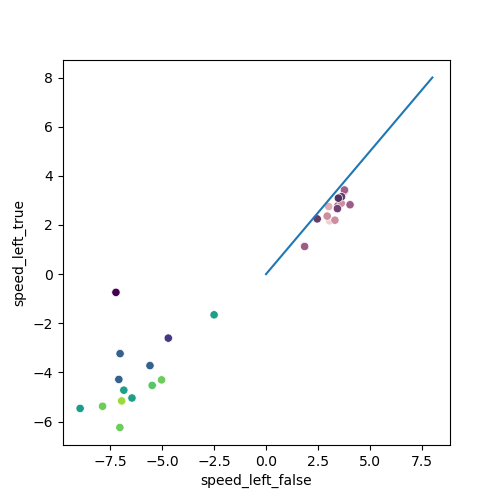

In [72]:
select = all_infos

select = select[select['mode']=="BF"]
select = select[select['coverage_tot']>0.1]
# select = select[select['video_int']<=64]

grouped = select.groupby(['edge', 'slowed'])[['speed_left','speed_right','dist_bleach']].mean().reset_index()

# Pivot the table
pivot_df1 = grouped.pivot(index='edge', columns='slowed', values=['speed_left','dist_bleach']).reset_index()

# Renaming columns for clarity
pivot_df1.columns = ['edge', 'speed_left_false', 'speed_left_true','signed_dist_bleach_True','signed_dist_bleach_False']
pivot_df2 = grouped.pivot(index='edge', columns='slowed', values=['speed_right','dist_bleach']).reset_index()

# Renaming columns for clarity
pivot_df2.columns = ['edge', 'speed_right_false', 'speed_right_true','signed_dist_bleach_True','signed_dist_bleach_False']
# Plottiue
fig,ax = plt.subplots(figsize=(5,5))
sns.scatterplot(pivot_df1,x='speed_left_false',y= 'speed_left_true', hue = "signed_dist_bleach_True",palette="viridis")
ax.plot([0,8],[0,8])
sns.scatterplot(pivot_df2,x='speed_right_false',y= 'speed_right_true', hue = "signed_dist_bleach_True")
# ax.plot(pivot_df2['speed_right_false'],pivot_df2['speed_right_false'])
ax. get_legend().set_visible(False)

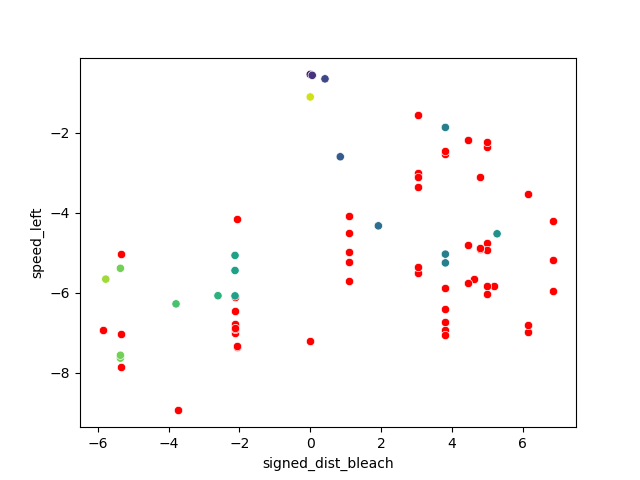

In [80]:
select = all_infos
select = select[select['mode']!="F"]
select = select[select['coverage_tot']>0.05]
select = select[select['video_int']<=70]

select1 = select[select['slowed']]
select2 = select[select['slowed']==False]
select1 = select1[select1['video_int']<=64]

fig,ax = plt.subplots()
# select
# sns.scatterplot(select,x='ypos',y='speed_right',hue="record_time")
sns.scatterplot(select2,x='signed_dist_bleach',y='speed_left',color="red")
sns.scatterplot(select1,x='signed_dist_bleach',y='speed_left',hue="record_time",palette = "viridis")

for index, row in select.iterrows():
    ax.text(row['signed_dist_bleach'],row['speed_right'],row['video_int'])
# ax.vlines(pos_bleach,0,-8,color="red")
ax. get_legend().set_visible(False)

In [ ]:
vzjv jhe v

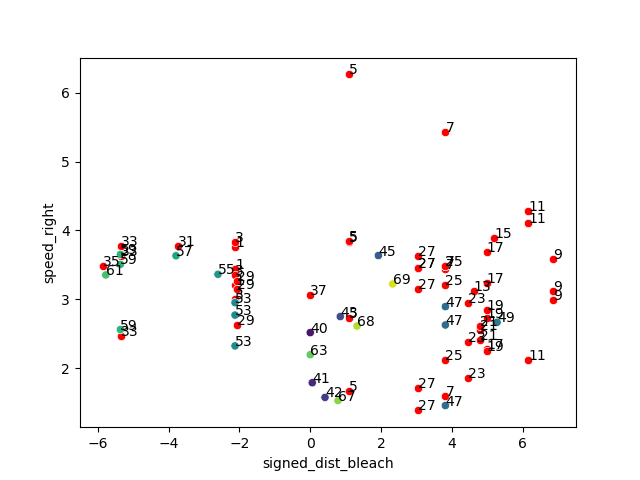

In [78]:
select = all_infos
select = select[select['mode']!="F"]
select = select[select['coverage_tot']>0.05]
select = select[select['video_int']<=70]

select1 = select[select['slowed']]
select2 = select[select['slowed']==False]



fig,ax = plt.subplots()
# select
# sns.scatterplot(select,x='ypos',y='speed_right',hue="record_time")
sns.scatterplot(select2,x='signed_dist_bleach',y='speed_right',color="red")
sns.scatterplot(select1,x='signed_dist_bleach',y='speed_right',hue="record_time",palette = "viridis")

for index, row in select.iterrows():
    ax.text(row['signed_dist_bleach'],row['speed_right'],row['video_int'])
# ax.vlines(pos_bleach,0,-8,color="red")
ax. get_legend().set_visible(False)

In [ ]:
np.cos(np.pi/32)

In [ ]:
select = all_infos
select = select[select['mode']!="F"]
select = select[select['coverage_tot']>0.1]


fig,ax = plt.subplots()
# select
# sns.scatterplot(select,x='ypos',y='speed_right',hue="record_time")
sns.scatterplot(select,x='xpos',y='speed_right',hue="slowed")
# for index, row in select.iterrows():
#     ax.text(row['xpos'],row['speed_left'],row['video_int'])
ax.vlines(pos_bleach,0,5,color="red")
ax. get_legend().set_visible(False)

In [ ]:
select['video_int'].astype(str)

In [ ]:
select = all_infos[all_infos['abcisse_1316607_1307901']>0]
select = select[select['mode']!="F"]
select = select[select['coverage_tot']>0.1]


fig,ax = plt.subplots()
# select
sns.scatterplot(select,x='abcisse_1316607_1307901',y='speed_right',hue="plate_id")
sns.scatterplot(select,x='abcisse_1316607_1307901',y='speed_left',hue="plate_id")
for index, row in select.iterrows():
    ax.text(row['abcisse_1316607_1307901'],row['speed_right'],row['video_int'])

# ax.text(select['abcisse_1316607_1307901'],select['speed_right'],select['video_int'].astype(str))
ax.get_legend().set_visible(False)

In [ ]:
for index, row in select.iterrows():
    ax.text(row['abcisse_1316607_1307901'],row['speed_right'],row['video_int'])
